In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


In [2]:
pd.set_option('display.max_columns', None)
raw_data = pd.read_csv('marketing_segmentation_campaign.csv',header=0,delimiter='\t')
raw_data.head(50)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [ ]:
raw_data[raw_data['Income'].isnull()].sort_values(by=['Year_Birth'])

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
raw_data.groupby(['Year_Birth','Education']).mean().sort_values(by=['Year_Birth'])

In [16]:
customer_data = raw_data.copy( )

Income for some customers not present(Nan). Replaced with mean income grouped on the basis of Education

In [36]:
customer_data[customer_data['Income'].isnull()].sort_values(by=['Year_Birth'])

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [34]:
customer_data['Income'].iloc[[2084,48,2079,2081,90,91,1382,43,128,133,1383,2059,319,1379,2078,1386,71,92,2228,2061,58,10,27,312]] = [71335.0,55326.0,52764.0,60027.0,46976.0,50623.0,61730.0,52475,60152.0,53659.0,57645.0,52061.0,51828.0,54966.0,45500.0,55935.0,39475.0,45046.0,36094.0,53843.0,49944.0,43476.0,48825,41580]

c:\Users\karmalic\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [40]:
customer_data.head(50)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [ ]:
#Calculating days customer has been part of company till present(Present date 21-06-2022)
dt1 = pd.to_datetime(customer_data['Dt_Customer'])
dt2 = pd.to_datetime('21-06-2022')
dt1

In [57]:
customer_data['Total_days_joined'] = (dt2-dt1)

In [65]:
#Calculating Age from Year of Birth
customer_data['Age'] = 2022 - customer_data['Year_Birth']


In [67]:
customer_data.head(50)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_days_joined,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,3725 days,65
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2879 days,68
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,3226 days,57
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,2819 days,38
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,3075 days,41
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0,3207 days,55
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0,3507 days,51
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0,3242 days,37
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1,3302 days,48
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0,3022 days,72


In [74]:
customer_data['Total_days_joined']=customer_data.Total_days_joined.apply(lambda x: x.days)

c:\Users\karmalic\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_days_joined,Age
2233,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,3,11,0,3422,45


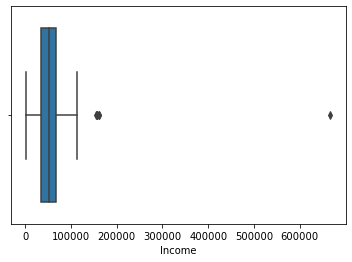

In [86]:
sns.boxplot(customer_data['Income'])
customer_data['Income'].describe()
customer_data[customer_data['Income']>500000]

c:\Users\karmalic\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_days_joined'>

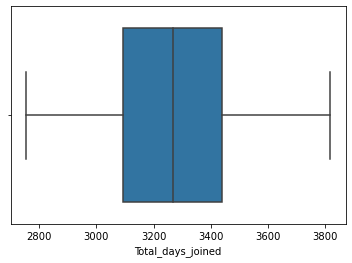

In [82]:
sns.boxplot(customer_data['Total_days_joined'])

c:\Users\karmalic\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income', ylabel='Recency'>

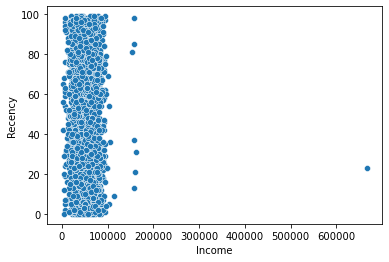

In [80]:
sns.scatterplot(customer_data['Income'],customer_data['Recency'])

In [88]:
customer_data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Total_days_joined', 'Age'],
      dtype='object')

Extracting only feature columns

In [89]:
data_features = customer_data[['Age','Education','Marital_Status','Income','Kidhome','Teenhome',
       'Total_days_joined','Recency','MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response' ]]

In [92]:
data_features.head(50)

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Total_days_joined,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,65,Graduation,Single,58138.0,0,0,3725,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,68,Graduation,Single,46344.0,1,1,2879,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,57,Graduation,Together,71613.0,0,0,3226,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,38,Graduation,Together,26646.0,1,0,2819,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,41,PhD,Married,58293.0,1,0,3075,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,55,Master,Together,62513.0,0,1,3207,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,51,Graduation,Divorced,55635.0,0,1,3507,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,37,PhD,Married,33454.0,1,0,3242,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,48,PhD,Together,30351.0,1,0,3302,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,72,PhD,Together,5648.0,1,1,3022,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [93]:
data_features['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [94]:
data_features['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [ ]:
data_features['Marital_Status'] = data_features['Marital_Status'].map({'Single':0,'Together':1,'Married':2,'Divorced':3,'Widow':4,'Alone':5,
'Absurd':6,'YOLO':7})

In [ ]:
data_features['Education'] = data_features['Education'].map({'Graduation':0,'PhD':1,'Master':2,'Basic':3,'2n Cycle':4})

In [ ]:
data_features['Children'] = data_features['Kidhome']+data_features['Teenhome']


Removing unnecessary columns. Made single column CHildren = KidHome + Teenhome

In [139]:
data_features = data_features.drop(['Kidhome','Teenhome','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Complain','Z_CostContact','Z_Revenue','Response'],axis=1)

In [147]:
data_features.columns

Index(['Age', 'Education', 'Marital_Status', 'Income', 'Total_days_joined',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Children'],
      dtype='object')

<AxesSubplot:xlabel='Age'>

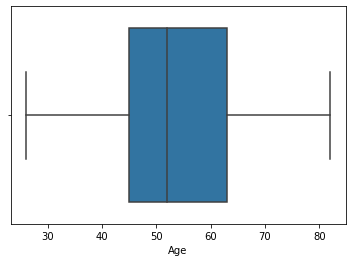

In [228]:
sns.boxplot(x=data_features['Age'])

<AxesSubplot:xlabel='Income'>

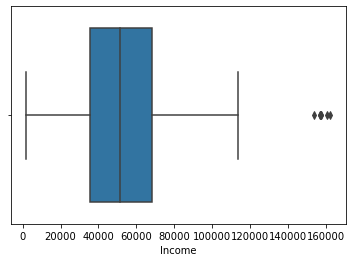

In [229]:
sns.boxplot(x=data_features['Income'])

<AxesSubplot:xlabel='Age'>

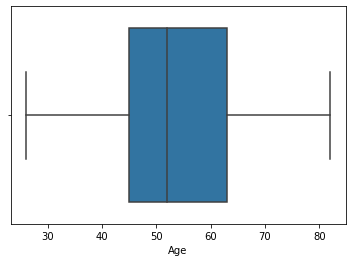

In [230]:
sns.boxplot(x=data_features['Age'])

We notice that Income and Age has few very significant outliers. Age cannot be around 120 or more
Removing the outliers

In [153]:
data_features[data_features['Income']>200000]

,Age,Education,Marital_Status,Income,Total_days_joined,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Children
2233,45,0,1,666666.0,3422,23,9,14,18,8,1,12,4,3,1,3,6,1


In [157]:
data_features[data_features['Age']>90]

,Age,Education,Marital_Status,Income,Total_days_joined,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Children
192,122,4,3,36640.0,3190,99,15,6,8,7,4,25,1,2,1,2,5,1
239,129,4,0,60182.0,2957,23,8,0,5,7,0,2,1,1,0,2,4,1
339,123,1,1,83532.0,3190,36,755,144,562,104,64,224,1,4,6,4,1,0


In [ ]:
data_features.drop([2233,192,239,339],axis=0,inplace=True)
data_features.reset_index()

c:\Users\karmalic\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income'>

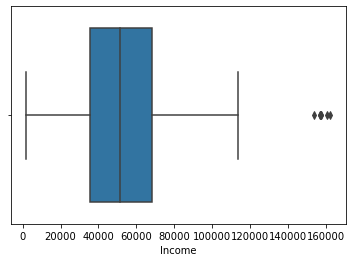

In [161]:
sns.boxplot(data_features['Income'])

In [162]:
x_scaled = preprocessing.scale(data_features)

In [119]:
x_scaled.dtype

dtype('float64')

In [163]:
wcss =[]
cluster_number = 11
for i in range(2,cluster_number):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

wcss

    



[29385.07148103464,
 26456.388841780616,
 25390.31772941164,
 24384.09621692491,
 23475.078157588785,
 22831.431307856743,
 22148.02902351776,
 21581.125874660345,
 21221.480899560633]

Text(0.5, 1.0, 'Elbow Method')

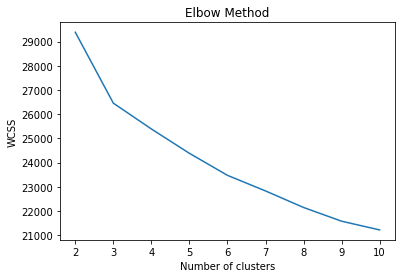

In [164]:
cl_range = range(2,cluster_number)
plt.plot(cl_range,wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')

We will use number of clusters as 3 as the graph shows significant change at these numbers

USING PCA for dimensionality reduction and plotting for analysis

In [173]:
pca_components_count = 2
components_data = PCA(n_components=pca_components_count,random_state=42).fit_transform(x_scaled)
result = pd.DataFrame(components_data,columns=['PCA1','PCA2'])



In [174]:
kmeans = KMeans(3)
kmeans.fit(result)
kmeans.fit_predict(result)
cluster_scaled_data = data_features.copy()
cluster_scaled_data['Cluster'] = kmeans.fit_predict(result)

<AxesSubplot:xlabel='PCA1', ylabel='PCA2'>

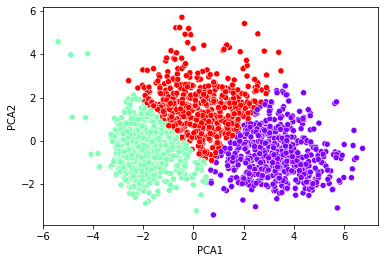

In [182]:
sns.scatterplot(x=result['PCA1'],y=result['PCA2'],c=cluster_scaled_data['Cluster'],cmap='rainbow')

Plotting count of each cluster

Text(0.5, 1.0, 'Distributions of clusters')

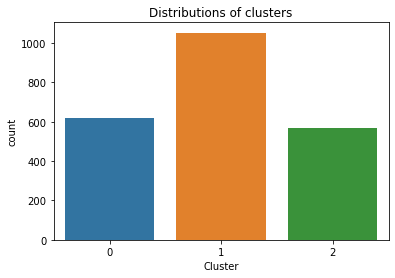

In [184]:
sns.countplot(x=cluster_scaled_data['Cluster'])
plt.title('Distributions of clusters')

We see that cluster 1 has highest count

In [ ]:
data_features.head(50)

In [ ]:
data_features['Expenditure'] = data_features.MntWines + data_features.MntFishProducts + data_features.MntFruits + data_features.MntGoldProds
+ data_features.MntMeatProducts + data_features.MntSweetProducts

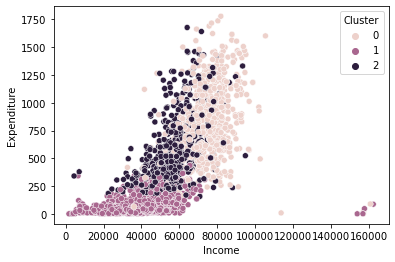

In [191]:
sns.scatterplot(x=data_features['Income'],y=data_features['Expenditure'],hue=cluster_scaled_data['Cluster'],cmap='rainbow')
plt.xlabel('Income')
plt.ylabel('Expenditure')
plt.show()

Cluster 0: Has High Income and and High expenditure
Cluster 1: low income and low expenditure
CLuster 2: Is the average group with average income and mostly averqage expenditure. Some have high expenditure

<AxesSubplot:xlabel='Cluster', ylabel='Expenditure'>

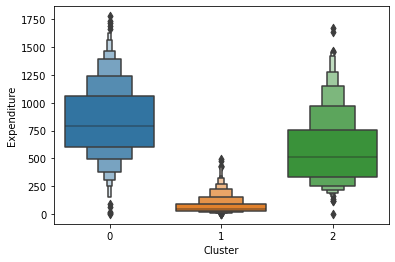

In [193]:
sns.boxenplot(x=cluster_scaled_data['Cluster'],y=data_features['Expenditure'])

Group 0 is biggest set of customers as per the plot

Which group has most onlineWeb purchases in a month? Which group does most in store purchases? Whats the difference?

Text(0.5, 1.0, 'Number of Online purchases per m')

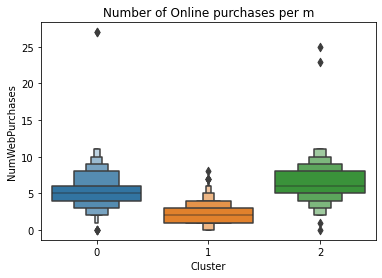

In [201]:
sns.boxenplot(x=cluster_scaled_data['Cluster'],y=data_features.NumWebPurchases)
plt.title('Number of Online purchases per m')

Cluster 2 leads in the most web purchases with cluster 0 not much behind

Text(0.5, 1.0, 'Number of Instore purchases per m')

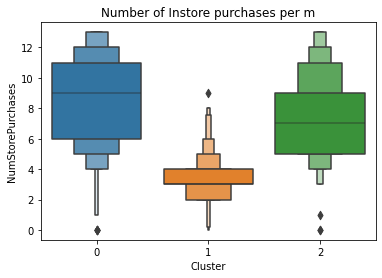

In [200]:
sns.boxenplot(x=cluster_scaled_data['Cluster'],y=data_features.NumStorePurchases)
plt.title('Number of Instore purchases per m')

Cluster 0(high income/high spent) leads with most Instore purchases with group 2 not much behind. Group1 being making few instore purchases.

NOW WE CHECK WHAT KIND OF PEOPLE ARE IN THESE CLUSTERS

<AxesSubplot:xlabel='Education', ylabel='Expenditure'>

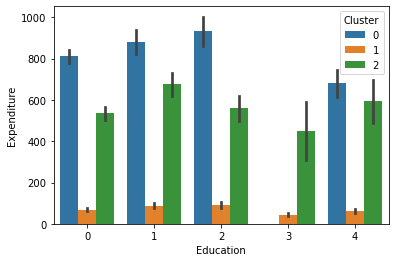

In [217]:
sns.barplot (x = data_features.Education,y=data_features.Expenditure, hue=cluster_scaled_data['Cluster'])

{'Graduation':0,'PhD':1,'Master':2,'Basic':3,'2n Cycle':4}
We see no one with Basic education is part of Cluster 0, While customers with remaining education have highest expenditure

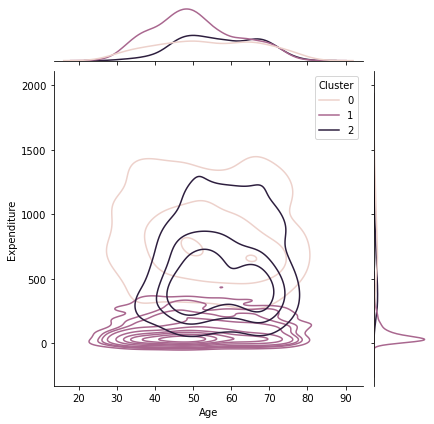

In [224]:
sns.jointplot(x = cluster_scaled_data.Age,y=data_features.Expenditure, hue=cluster_scaled_data['Cluster'],kind='kde')

These are kernel density plots, basically showing density distribution for each group.

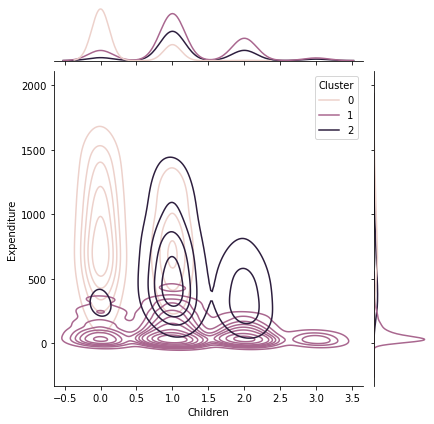

In [226]:
sns.jointplot(x = cluster_scaled_data.Children,y=data_features.Expenditure, hue=cluster_scaled_data['Cluster'],kind='kde')

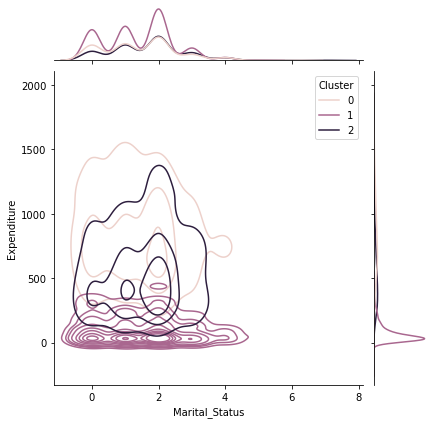

In [227]:
sns.jointplot(x = cluster_scaled_data.Marital_Status,y=data_features.Expenditure, hue=cluster_scaled_data['Cluster'],kind='kde')

Cluster 0(High Income High Expenditure):

Almost no People with 'Basic' education belong in this group
Most of the people lie in the age group 30-80 and have high spending habits.

They have at max a single child.



Cluster 1(Low income low expenditure)

They spread across all kinds of education

Most people lie across all age groups and have many children(uptill 3) MAjorly having single child

Relatively include younger people


Cluster 2(Average income)

They have spread across all types of education

They are relatively older than others

Very few have no children, Majority have a single child and some have 2

